# Stereo template matching/block matching


In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data

plt.gray()

<Figure size 432x288 with 0 Axes>

Start by loading a set of corresponding left and right image. We also resize the images since the computations we expect to do can take a long time to process. Resizing is optional, but recommended atleast until you have verified your computer is capable of doing the computations within reasonable time.

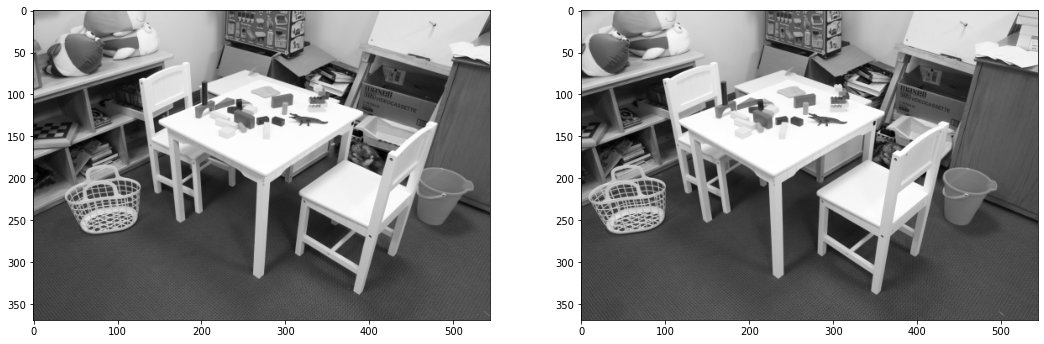

In [30]:
# load the images
img_left = cv2.imread("playtable_left.png")
img_right = cv2.imread("playtable_right.png")

# rescale images (can be left out)
img_size = (int(img_left.shape[1]/5), int(img_left.shape[0]/5))
img_left = cv2.resize(img_left, img_size, interpolation=cv2.INTER_AREA)
img_right = cv2.resize(img_right, img_size, interpolation=cv2.INTER_AREA)

# convert images to grayscale for template matching
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(gray_left)
ax_right.imshow(gray_right)

Next step is to create a disparity map based on the two stereo images. This is done using the same procedure as we did with exercise 1, except now we look for blocks of pixel from the left image in the right image, or vice versa.

## Exercise 2.1
You will have to play with the below parameters until you find a good solution that gives a representative 3D projection. Reflect/search on what those parameters actually mean and how they influence the outcome.

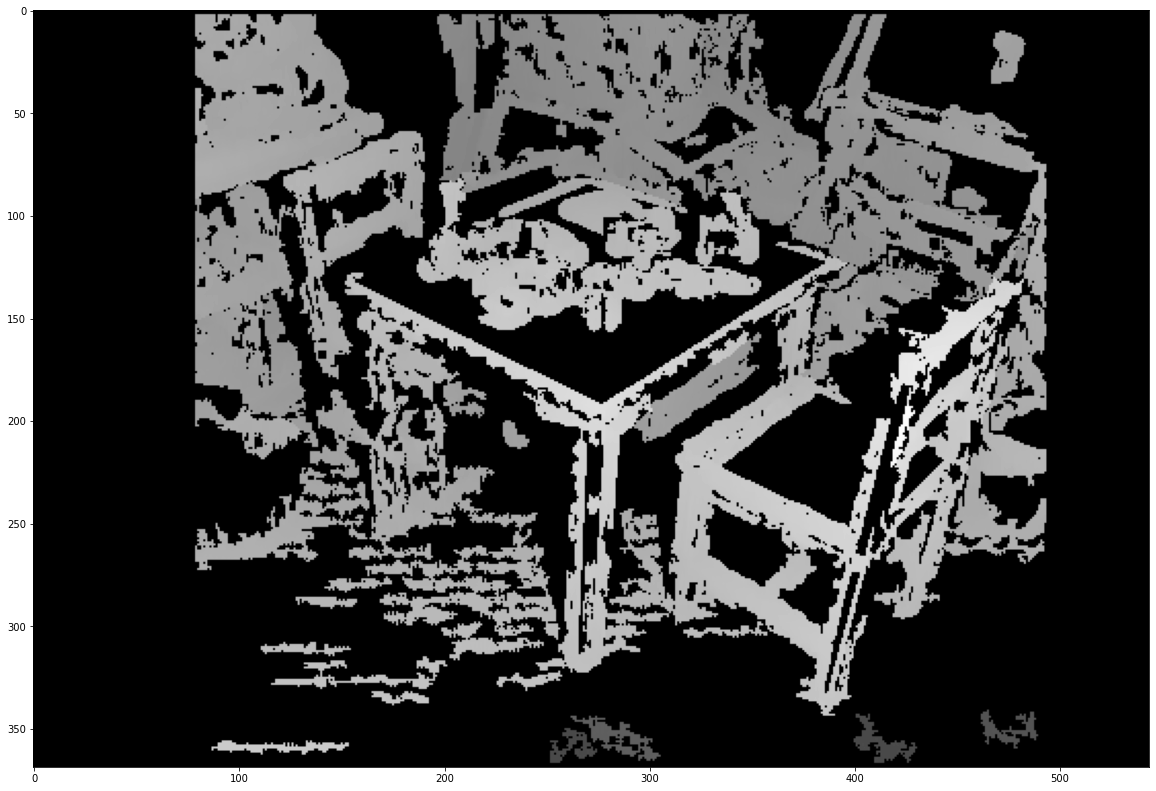

In [60]:
# Depth map function
SWS = 5
PFS = 5
PFC = 29
MDS = -50
NOD = 128
TTH = 100
UR = 10
SR = 15
SPWS = 100

num_disp = 16
block_size = 5
stereo = cv2.StereoBM_create(numDisparities = num_disp, blockSize = block_size)
stereo.setPreFilterType(1)
stereo.setPreFilterSize(PFS)
stereo.setPreFilterCap(PFC)
stereo.setMinDisparity(MDS)
stereo.setNumDisparities(NOD)
stereo.setTextureThreshold(TTH)
stereo.setUniquenessRatio(UR)
stereo.setSpeckleRange(SR)
stereo.setSpeckleWindowSize(SPWS)

disp = stereo.compute(gray_left, gray_right).astype(np.float32)

plt.figure(figsize=(20,20))
plt.imshow(disp)

## Exercise 2.2
Once you have a disparity map without too much noise, you can use the below to export you disparity map to a .ply file that you can load and display in meshlab.

**Hint:** To open meshlab type `meshlab` in a terminal or click on `Activities` in the top left corner and search for `meshlab`. Then clik `File` > `Import Mesh` and navigate to where our source-code is located and open `out.ply`.

In [73]:
def export_pointcloud(disparity_map, colors, name):
    ply_header = '''ply
    format ascii 1.0
    element vertex %(vert_num)d
    property float x
    property float y
    property float z
    property uchar red
    property uchar green
    property uchar blue
    end_header
    '''

    def write_ply(fn, verts, colors):
        verts = verts.reshape(-1, 3)
        colors = colors.reshape(-1, 3)
        verts = np.hstack([verts, colors])
        with open(fn, 'wb') as f:
            f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
            np.savetxt(f, verts, fmt='%f %f %f %d %d %d ')

    h, w = disparity_map.shape[:2]
    f = .8 * w  # guess for focal length. If you 3D reconstruction looks skewed in the viewing direction, try adjusting this parameter.
    Q = np.float32([[1, 0, 0, -0.5 * w],
                    [0, -1, 0, 0.5 * h],  # turn points 180 deg around x-axis,
                    [0, 0, 0, -f],  # so that y-axis looks up
                    [0, 0, 1, 0]])
    points = cv2.reprojectImageTo3D(disparity_map, Q)
    
    mask = disparity_map > disparity_map.min()
    out_points = points[mask]
    out_colors = colors[mask]
    out_fn = f"{name}.ply"
    write_ply(out_fn, out_points, out_colors)
    print(f'{out_fn} saved')

export_pointcloud(disparity_map=disp, colors=img_left, name="out")

out.ply saved


In [133]:
! meshlab


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /usr/lib/x86_64-linux-gnu/meshlab/plugins 
Shader directory found '/usr/share/meshlab/shaders', and it contains 19 gdp files
LOG: 0 Opened mesh /jupyter/notebooks/week_3/excercises/out1.ply in 1917 msec
LOG: 0 All files opened in 1919 msec
libpng warning: iCCP: known incorrect sRGB profile
LOG: 0 Recentering on point [0.006655 -0.054807 -0.262190] [587,270]
Snapping layer 0
LOG: 0 Snapshot saved to ./snapshot_strorage00_L00.png
^C


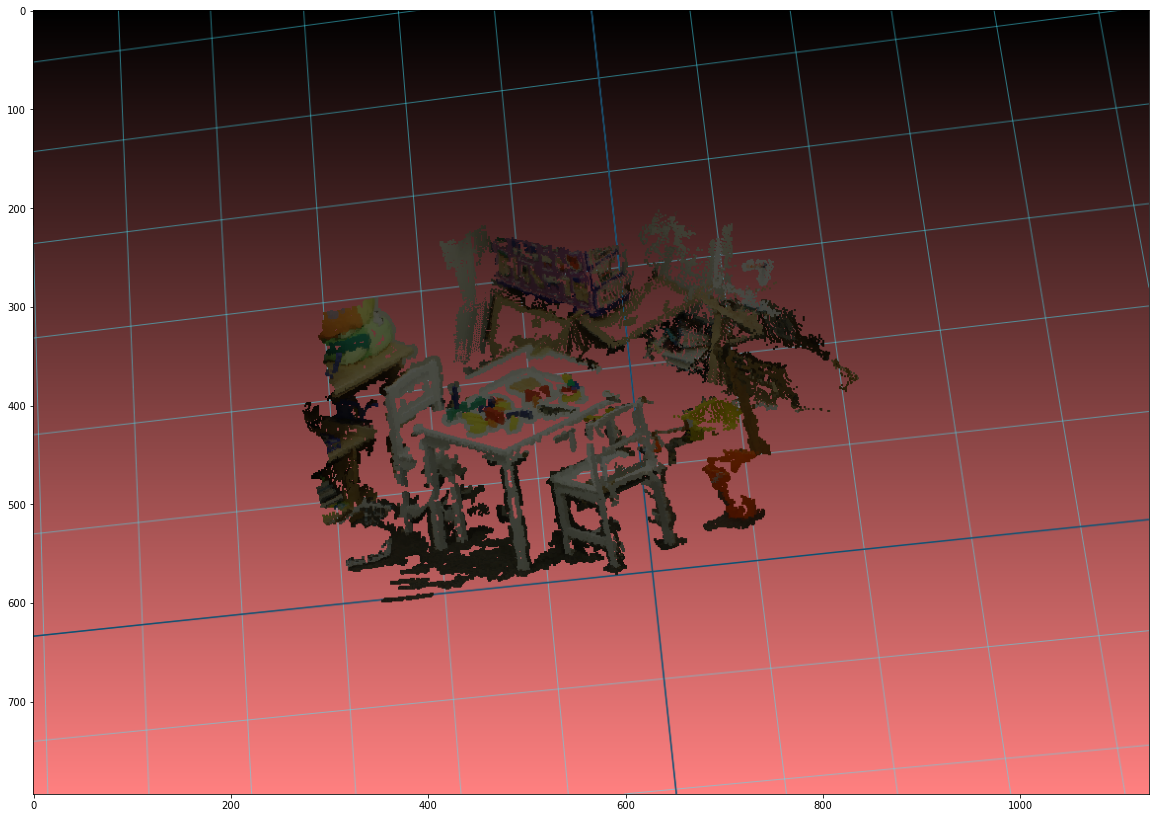

In [138]:
snapshot = cv2.imread("snapshot_table00_L00.png")
plt.figure(figsize=(20,30))
plt.imshow(snapshot)

## Exercise 2.3

Create a disparity map of the imageset `storage` and display it in meshlab.

out1.ply saved


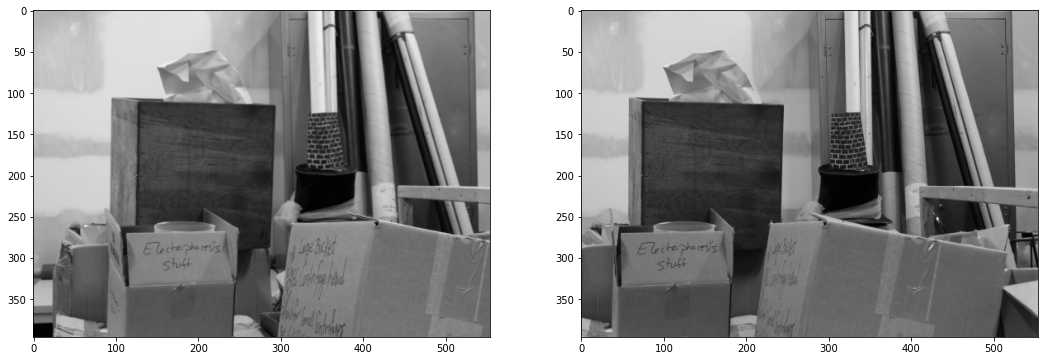

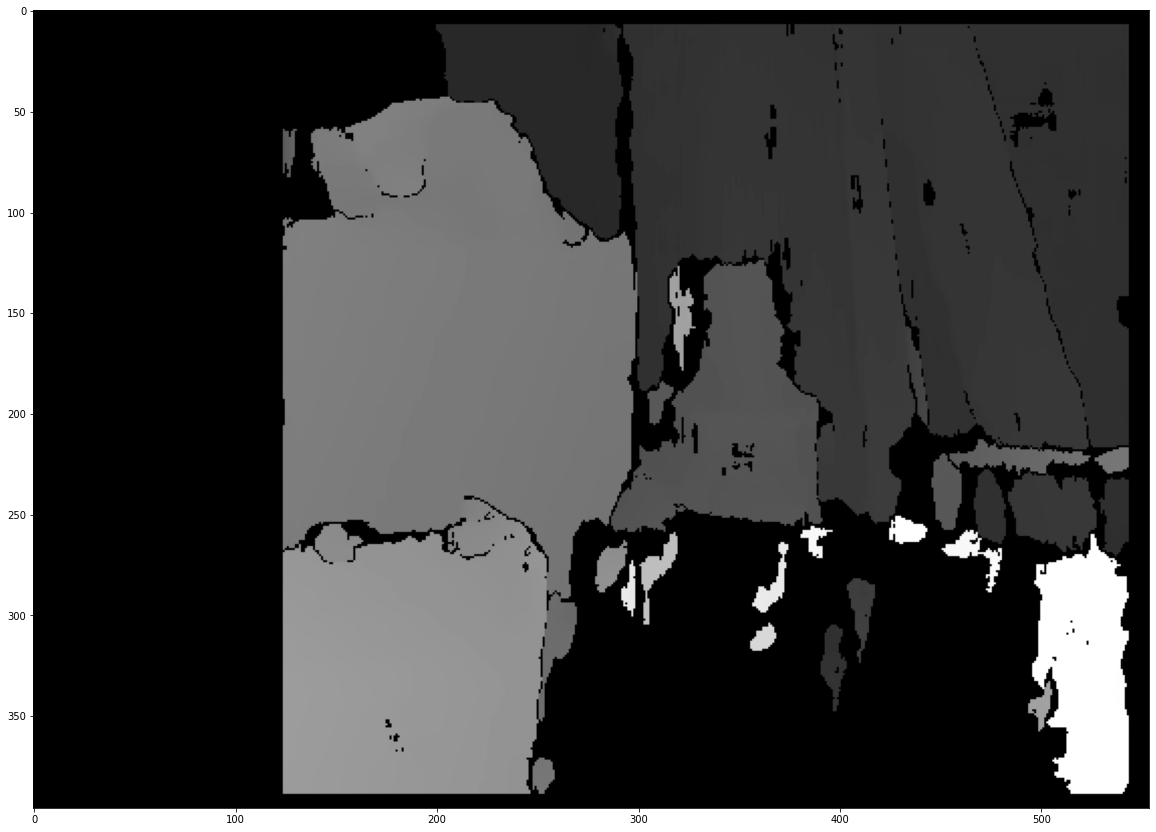

In [132]:

SWS = 5
PFS = 5
PFC = 29
MDS = -10
NOD = 128
TTH = 0
UR = 10
SR = 15
SPWS = 100

block_size = 15


# load the images
img_left = cv2.imread("storage_left.png")
img_right = cv2.imread("storage_right.png")

# rescale images (can be left out)
img_size = (int(img_left.shape[1]/5), int(img_left.shape[0]/5))
img_left = cv2.resize(img_left, img_size, interpolation=cv2.INTER_AREA)
img_right = cv2.resize(img_right, img_size, interpolation=cv2.INTER_AREA)

# convert images to grayscale for template matching
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(gray_left)
ax_right.imshow(gray_right)


stereo = cv2.StereoBM_create(numDisparities = NOD, blockSize = block_size)
stereo.setPreFilterType(1)
stereo.setPreFilterSize(PFS)
stereo.setPreFilterCap(PFC)
stereo.setMinDisparity(MDS)
stereo.setNumDisparities(NOD)
stereo.setTextureThreshold(TTH)
stereo.setUniquenessRatio(UR)
stereo.setSpeckleRange(SR)
stereo.setSpeckleWindowSize(SPWS)

disp = stereo.compute(gray_left, gray_right).astype(np.float32)

plt.figure(figsize=(20,30))
plt.imshow(disp)
export_pointcloud(disparity_map=disp, colors=img_left, name="out1")

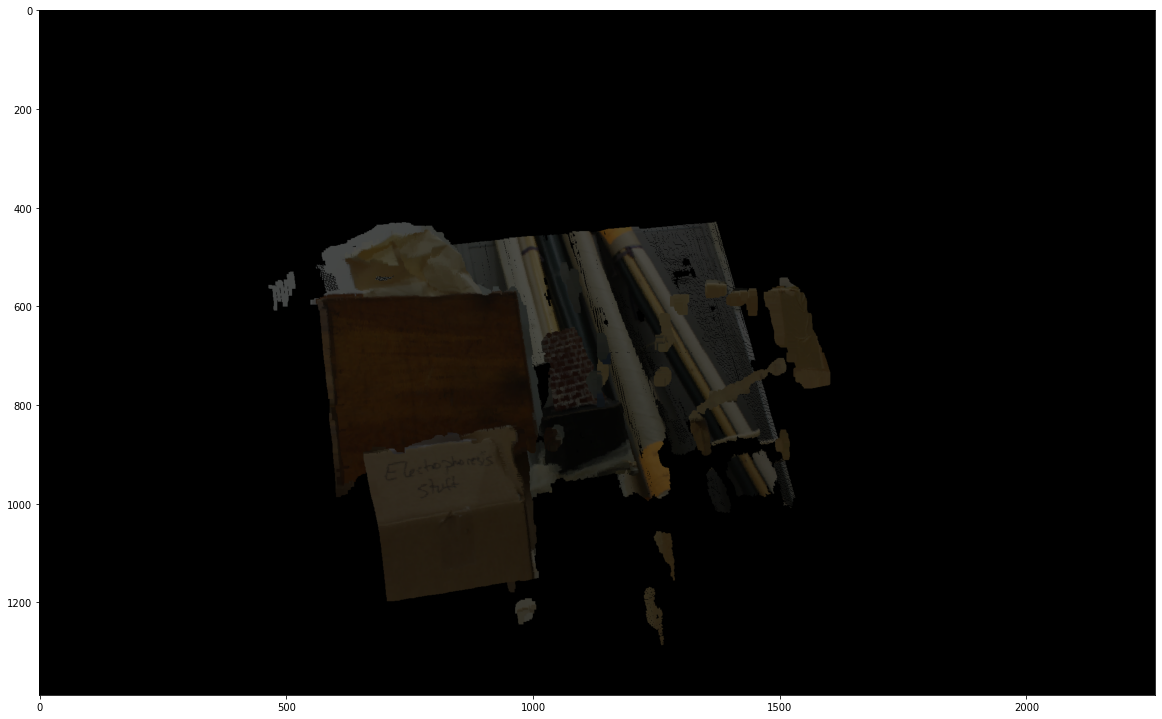

In [137]:
snapshot = cv2.imread("snapshot_strorage00_L00.png")
plt.figure(figsize=(20,30))
plt.imshow(snapshot)
